# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [51]:
import pandas as pd
#read in data file using read_csv function
df = pd.read_csv('/content/tobacco.csv')
#first i will convert 4 columns which are in percentage string form, to float

df['Smoke everyday'] = df['Smoke everyday'].str.rstrip('%').astype('float') / 100.0
df['Never smoked'] = df['Never smoked'].str.rstrip('%').astype('float') / 100.0
df['Former smoker'] = df['Former smoker'].str.rstrip('%').astype('float') / 100.0
df['Smoke some days'] = df['Smoke some days'].str.rstrip('%').astype('float') / 100.0
#use the shape function to see num of cols and rows
df.shape

(876, 7)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [52]:
#now find column's distinct values count

#initialize max unique counts variables
max_distinct_values = 0
max_distinct_column = None
#looping over the columns
for column in df.columns:
    distinct_values_count = len(df[column].unique())#use len and  unique functions to get unique values count in columns
    print(f"Column '{column}' has {distinct_values_count} distinct values.")
    #update max unique values column
    if distinct_values_count > max_distinct_values:
        max_distinct_values = distinct_values_count
        max_distinct_column = column
#print it out
print(f"\nThe column with the most distinct values is '{max_distinct_column}' with {max_distinct_values} distinct values.")



Column 'Year' has 16 distinct values.
Column 'State' has 56 distinct values.
Column 'Smoke everyday' has 187 distinct values.
Column 'Smoke some days' has 65 distinct values.
Column 'Former smoker' has 169 distinct values.
Column 'Never smoked' has 208 distinct values.
Column 'Location 1' has 56 distinct values.

The column with the most distinct values is 'Never smoked' with 208 distinct values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [53]:
#comparing the columns state and location 1, to see if they are the exact same and maybe we can delete one
if all(df['State']) == all(df['Location 1']):
  print('Both columns are the same and one can be deleted')

Both columns are the same and one can be deleted


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

<Axes: >

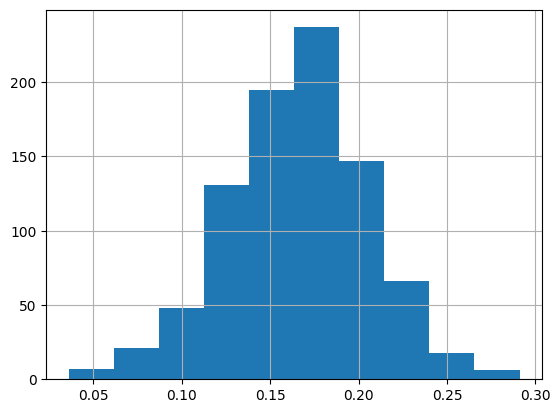

In [54]:
#distribution of values for the float column 'smoke everyday'
df['Smoke everyday'].hist()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

               Smoke everyday  Never smoked  Former smoker  Smoke some days
State                                                                      
Kentucky             0.248500      0.475625       0.234625         0.041500
Guam                 0.229571      0.559714       0.146857         0.063857
West Virginia        0.228313      0.486875       0.244375         0.040563
Tennessee            0.209000      0.535312       0.214500         0.041000
Indiana              0.207687      0.507375       0.234063         0.050938
Missouri             0.207687      0.499750       0.247062         0.045375
Oklahoma             0.202063      0.534937       0.215688         0.047125
Ohio                 0.201688      0.513125       0.239750         0.045375
Arkansas             0.199750      0.512687       0.240187         0.047313
Nevada               0.198375      0.488563       0.257250         0.055750


<Axes: xlabel='State'>

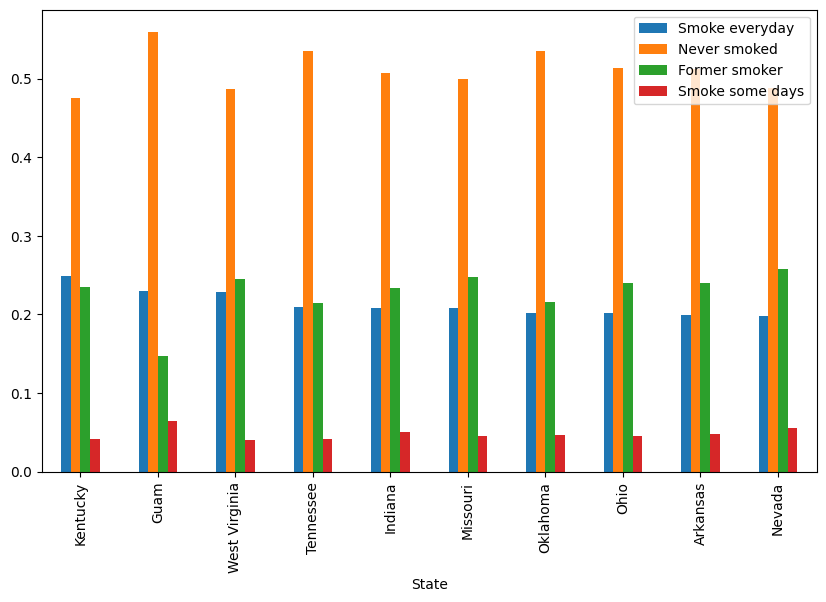

In [55]:
 #first I create a groupby object and use agg function to get the mean values for smoking statuses, and sort by smoke everyday status to get only top 10 states
df_smokers = df.groupby('State').agg({
     'Smoke everyday': 'mean',
     'Never smoked': 'mean',
     'Former smoker': 'mean',
     'Smoke some days': 'mean'
 }).sort_values(by='Smoke everyday', ascending=False).head(10)
 #now I create bar plot from the data which shows the top 10 states for mean 'smoke everyday' status and the respective other smoking status mean values
print(df_smokers)
df_smokers.plot(kind='bar', figsize=(10, 6))



---



## Submitting Your Work

Submit your work as usual.